In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='times')

In [2]:
#data = pd.read_csv('results_max_50_big.csv')
data = pd.read_csv('max_n_expander.csv')

In [3]:
data

,Unnamed: 0,n,t,r,sigma,r_fit,rep,d,loss_true,max_qnorm_ub_true,loss_fit,max_qnorm_ub_fit,gen_err_fit
0,0,20,3,3,0.0,3,0,3,0.0,9.834276,0.099532,18.892533,2.364428
1,1,20,3,3,0.0,3,0,7,0.0,10.140730,0.347273,80.298143,3.016480
2,2,20,3,3,0.0,3,0,11,0.0,8.533547,0.015310,7.632648,0.018456
3,3,20,3,3,0.0,3,0,15,0.0,7.423482,0.009874,7.345901,0.012126
4,4,20,3,3,0.0,3,1,3,0.0,8.186038,0.057532,6.595776,1.691891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,80,4,3,0.0,64,4,15,0.0,26.344706,0.001609,28.997084,0.045895
716,716,80,4,3,0.0,64,5,3,0.0,27.984765,0.027685,15.137691,1.002394
717,717,80,4,3,0.0,64,5,7,0.0,33.364299,0.011869,22.763609,0.056259
718,718,80,4,3,0.0,64,5,11,0.0,25.794101,0.004224,29.975955,0.056155


In [5]:
print("r's : " + str(data['r_fit'].unique()))
print("n's : " + str(data['n'].unique()))
print("t's : " + str(data['t'].unique()))
print("const's : " + str(data['d'].unique()))

r's : [ 3  8 16 32 64]
n's : [20 40 80]
t's : [3 4]
const's : [ 3  7 11 15]


In [6]:
data[(data['t'] ==3) & (data['sigma'] == 0.1)]

,Unnamed: 0,n,t,r,sigma,r_fit,rep,d,loss_true,max_qnorm_ub_true,loss_fit,max_qnorm_ub_fit,gen_err_fit


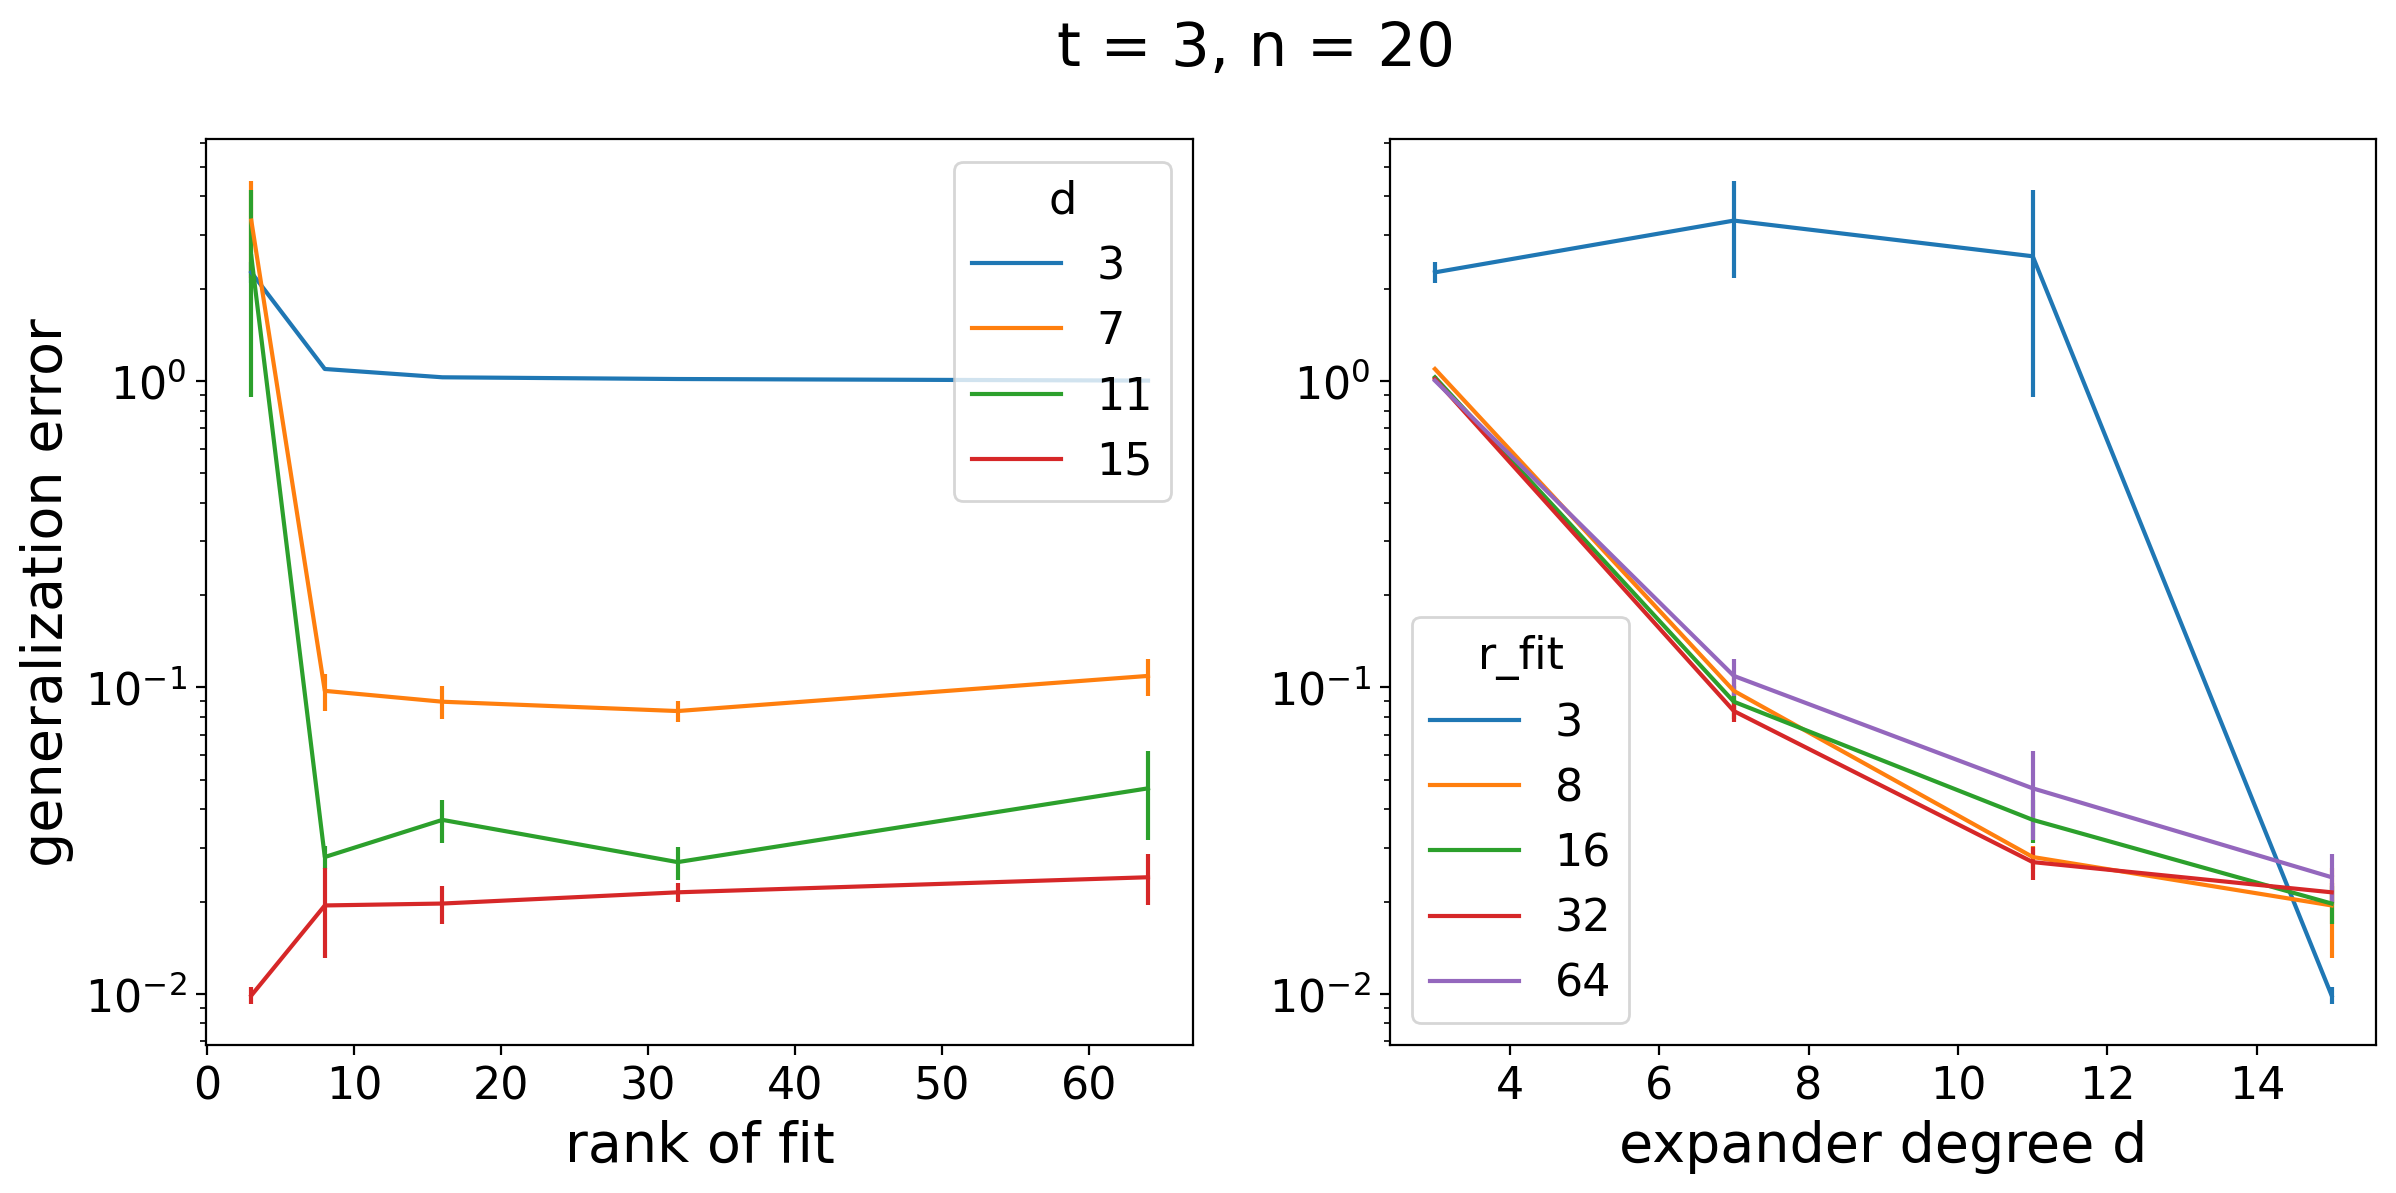

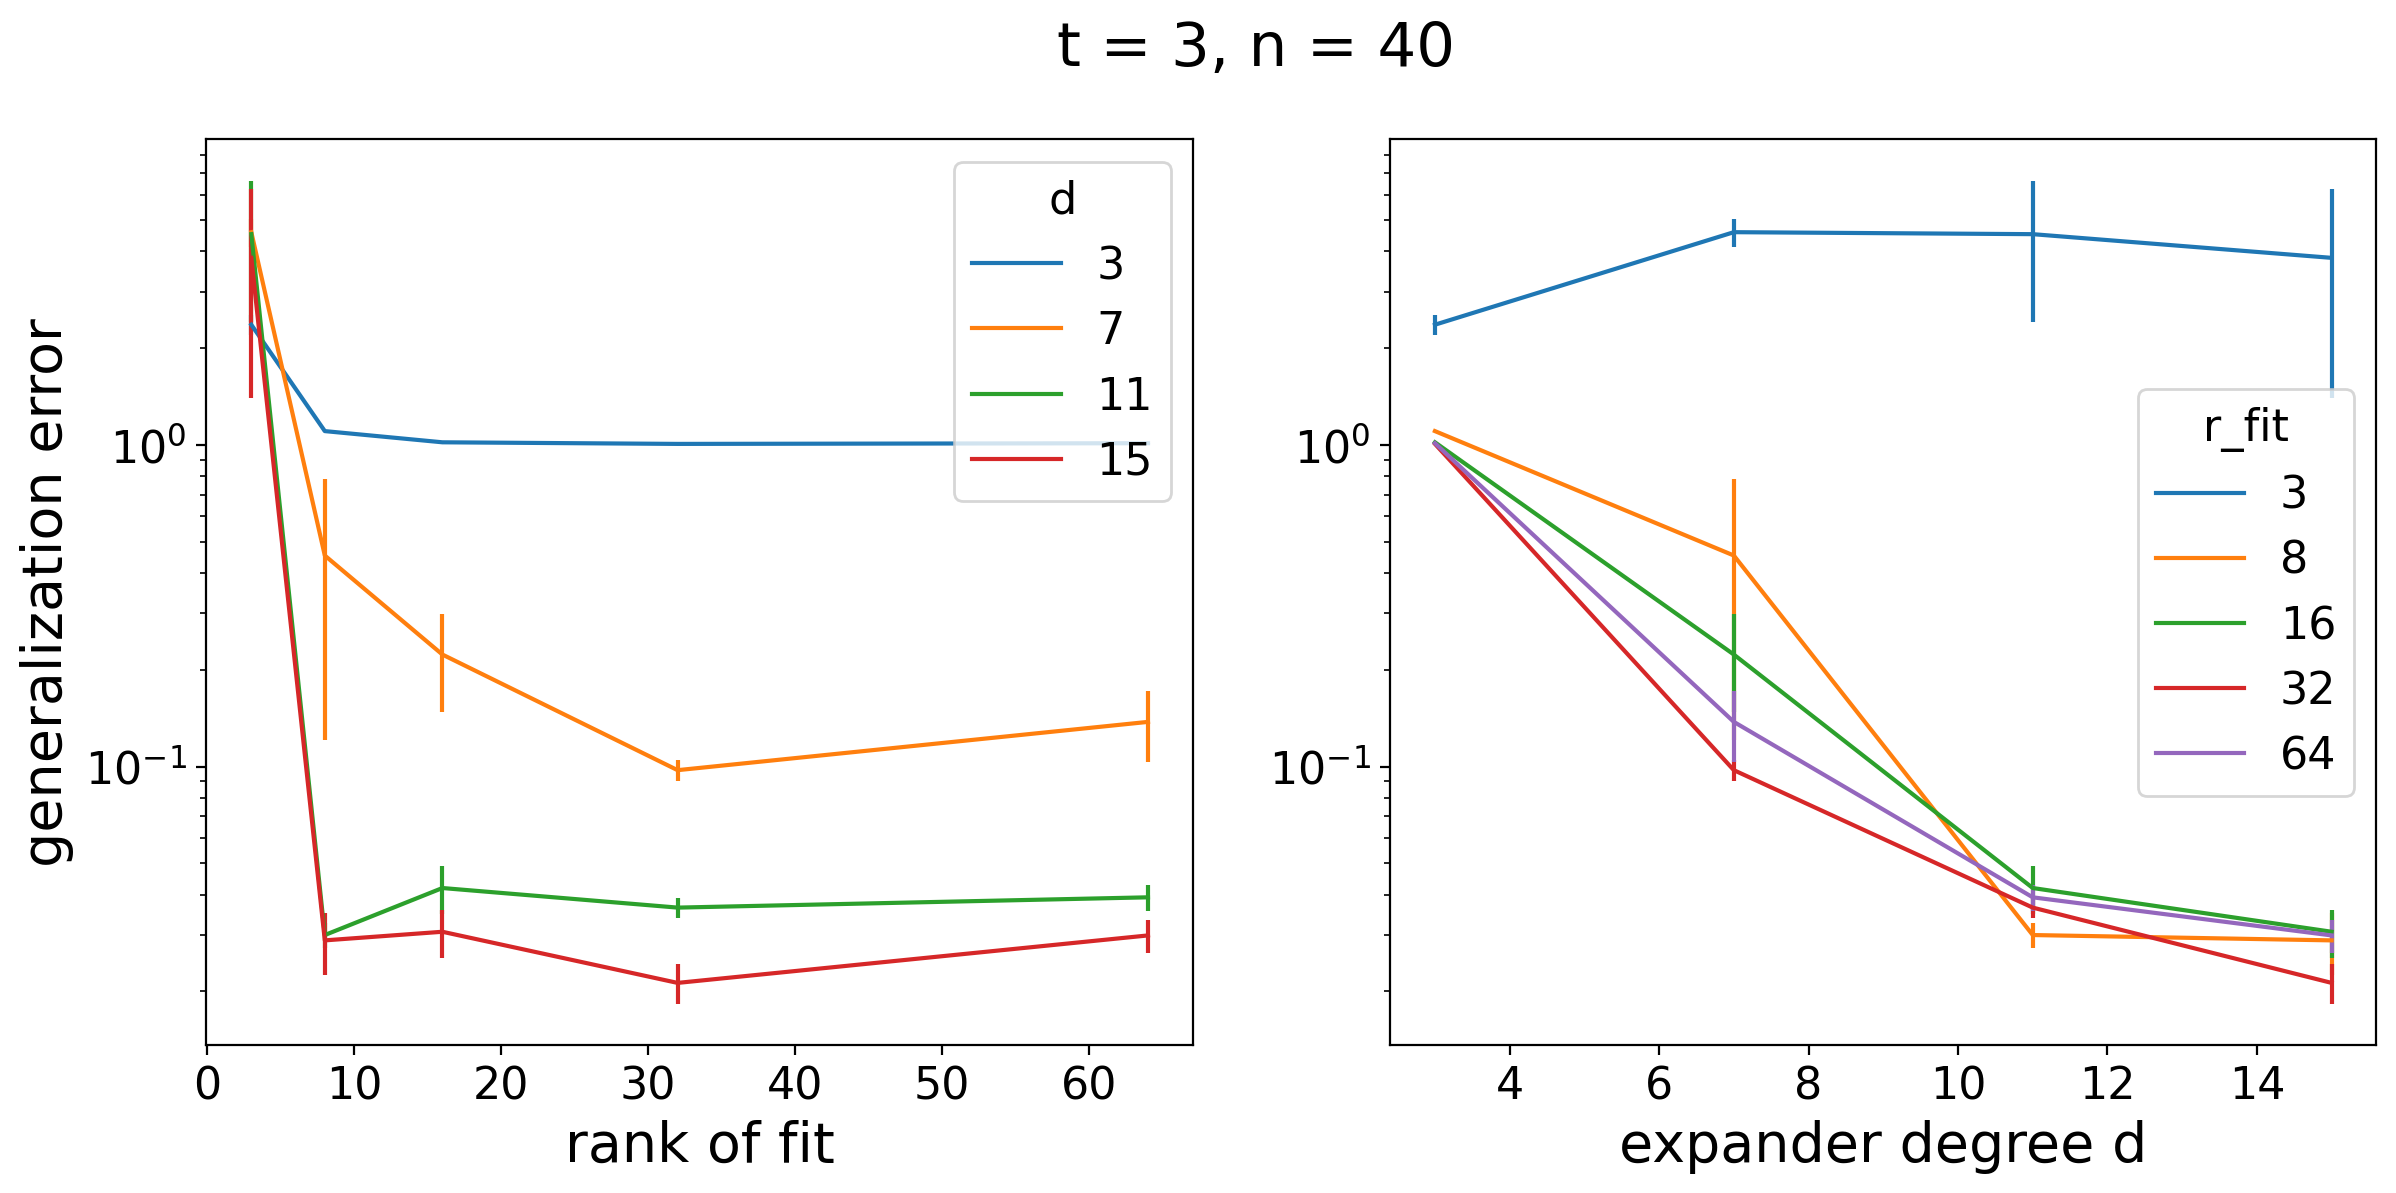

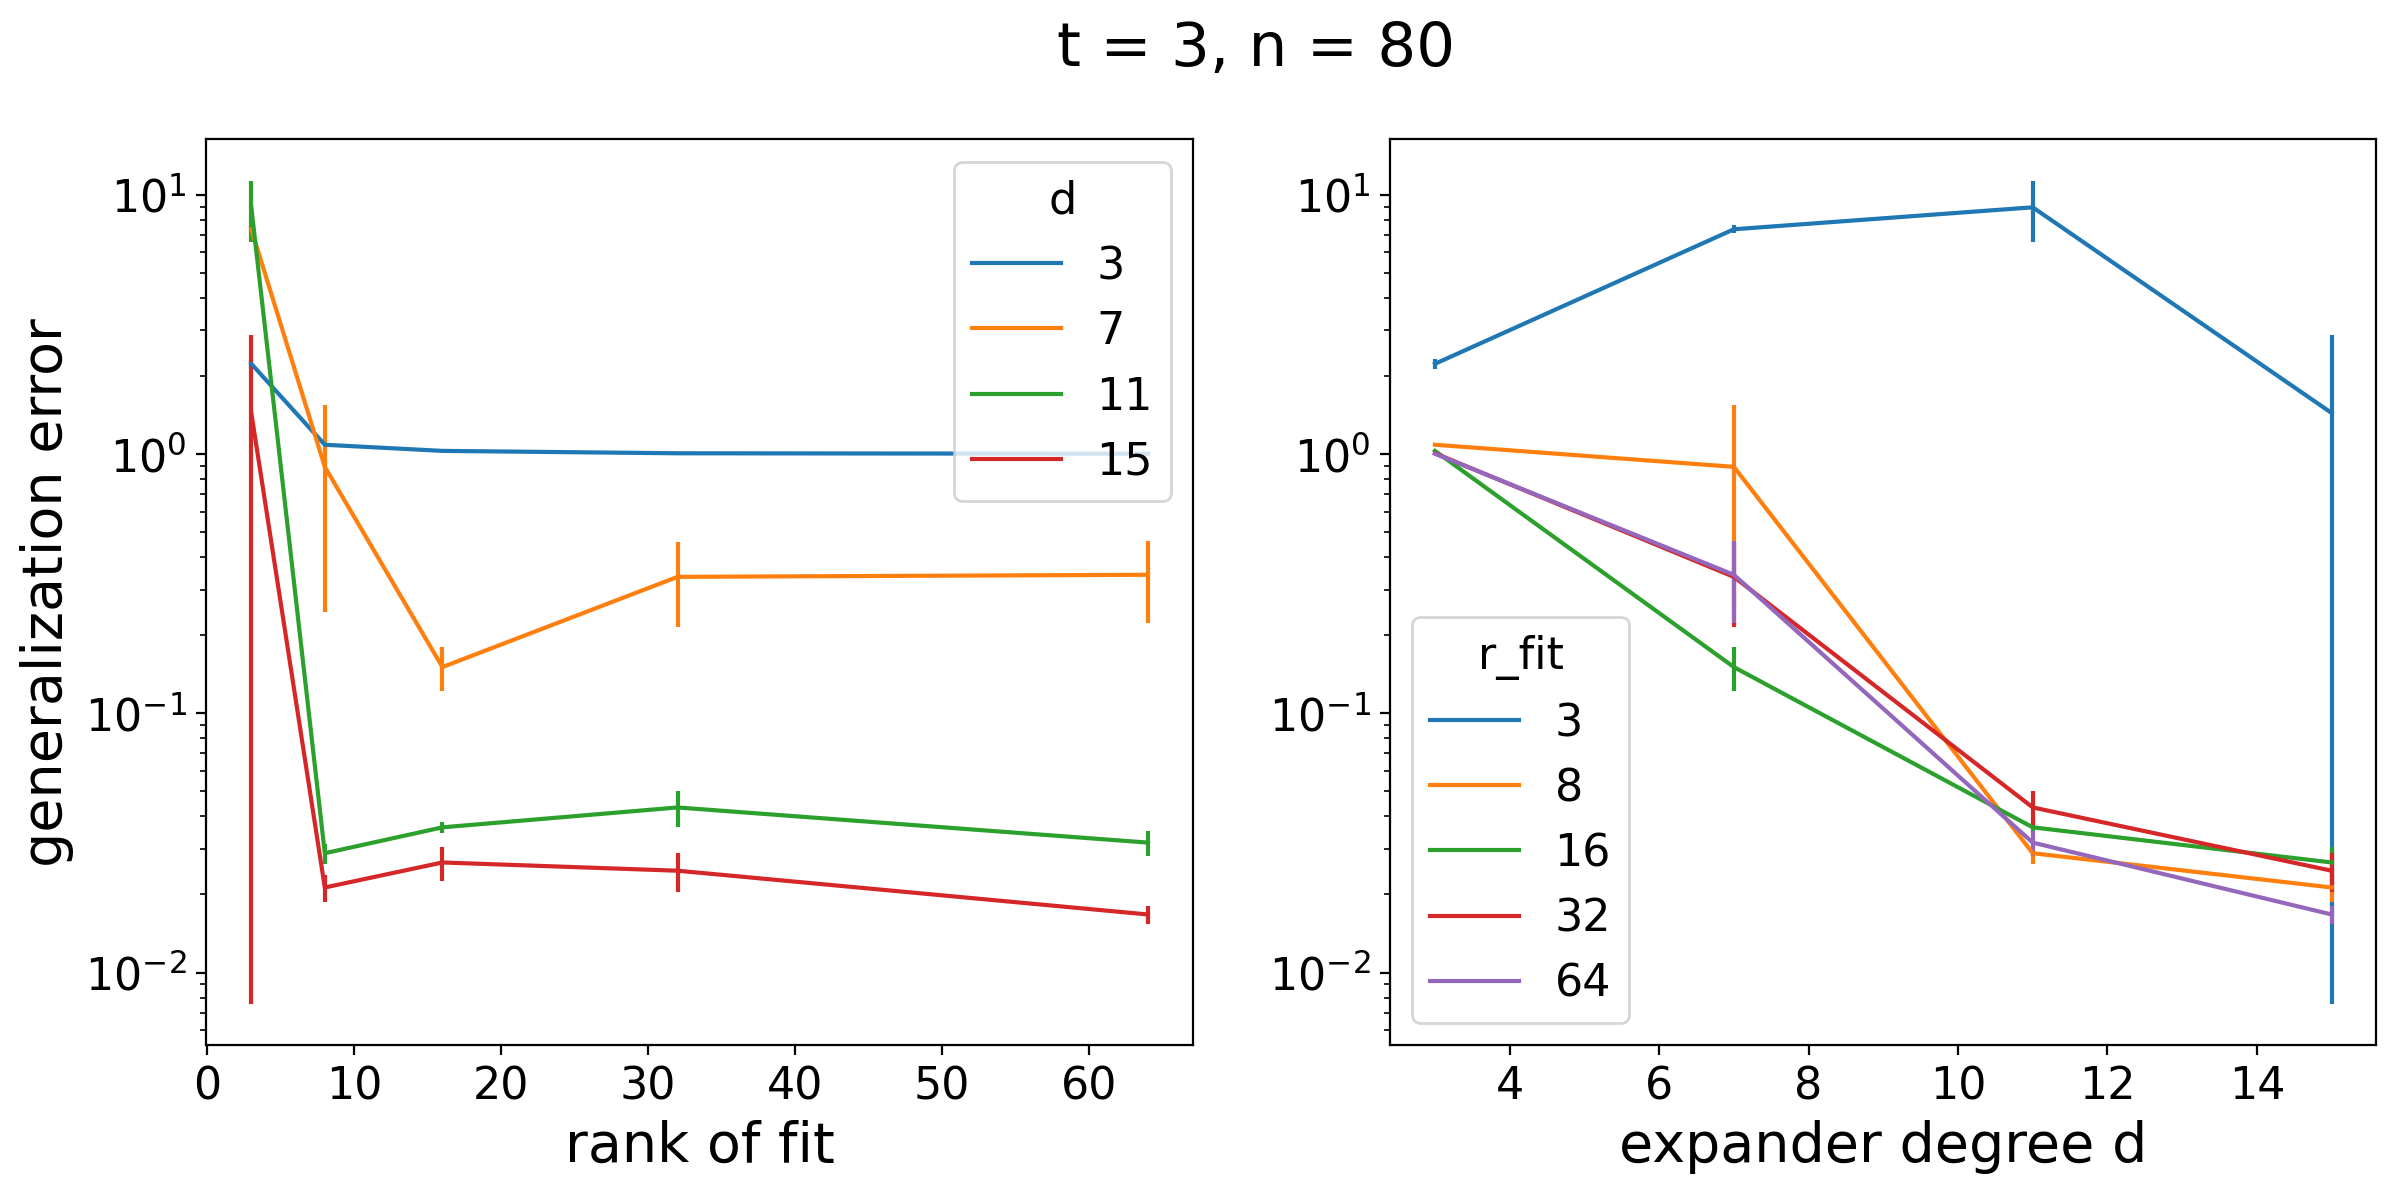

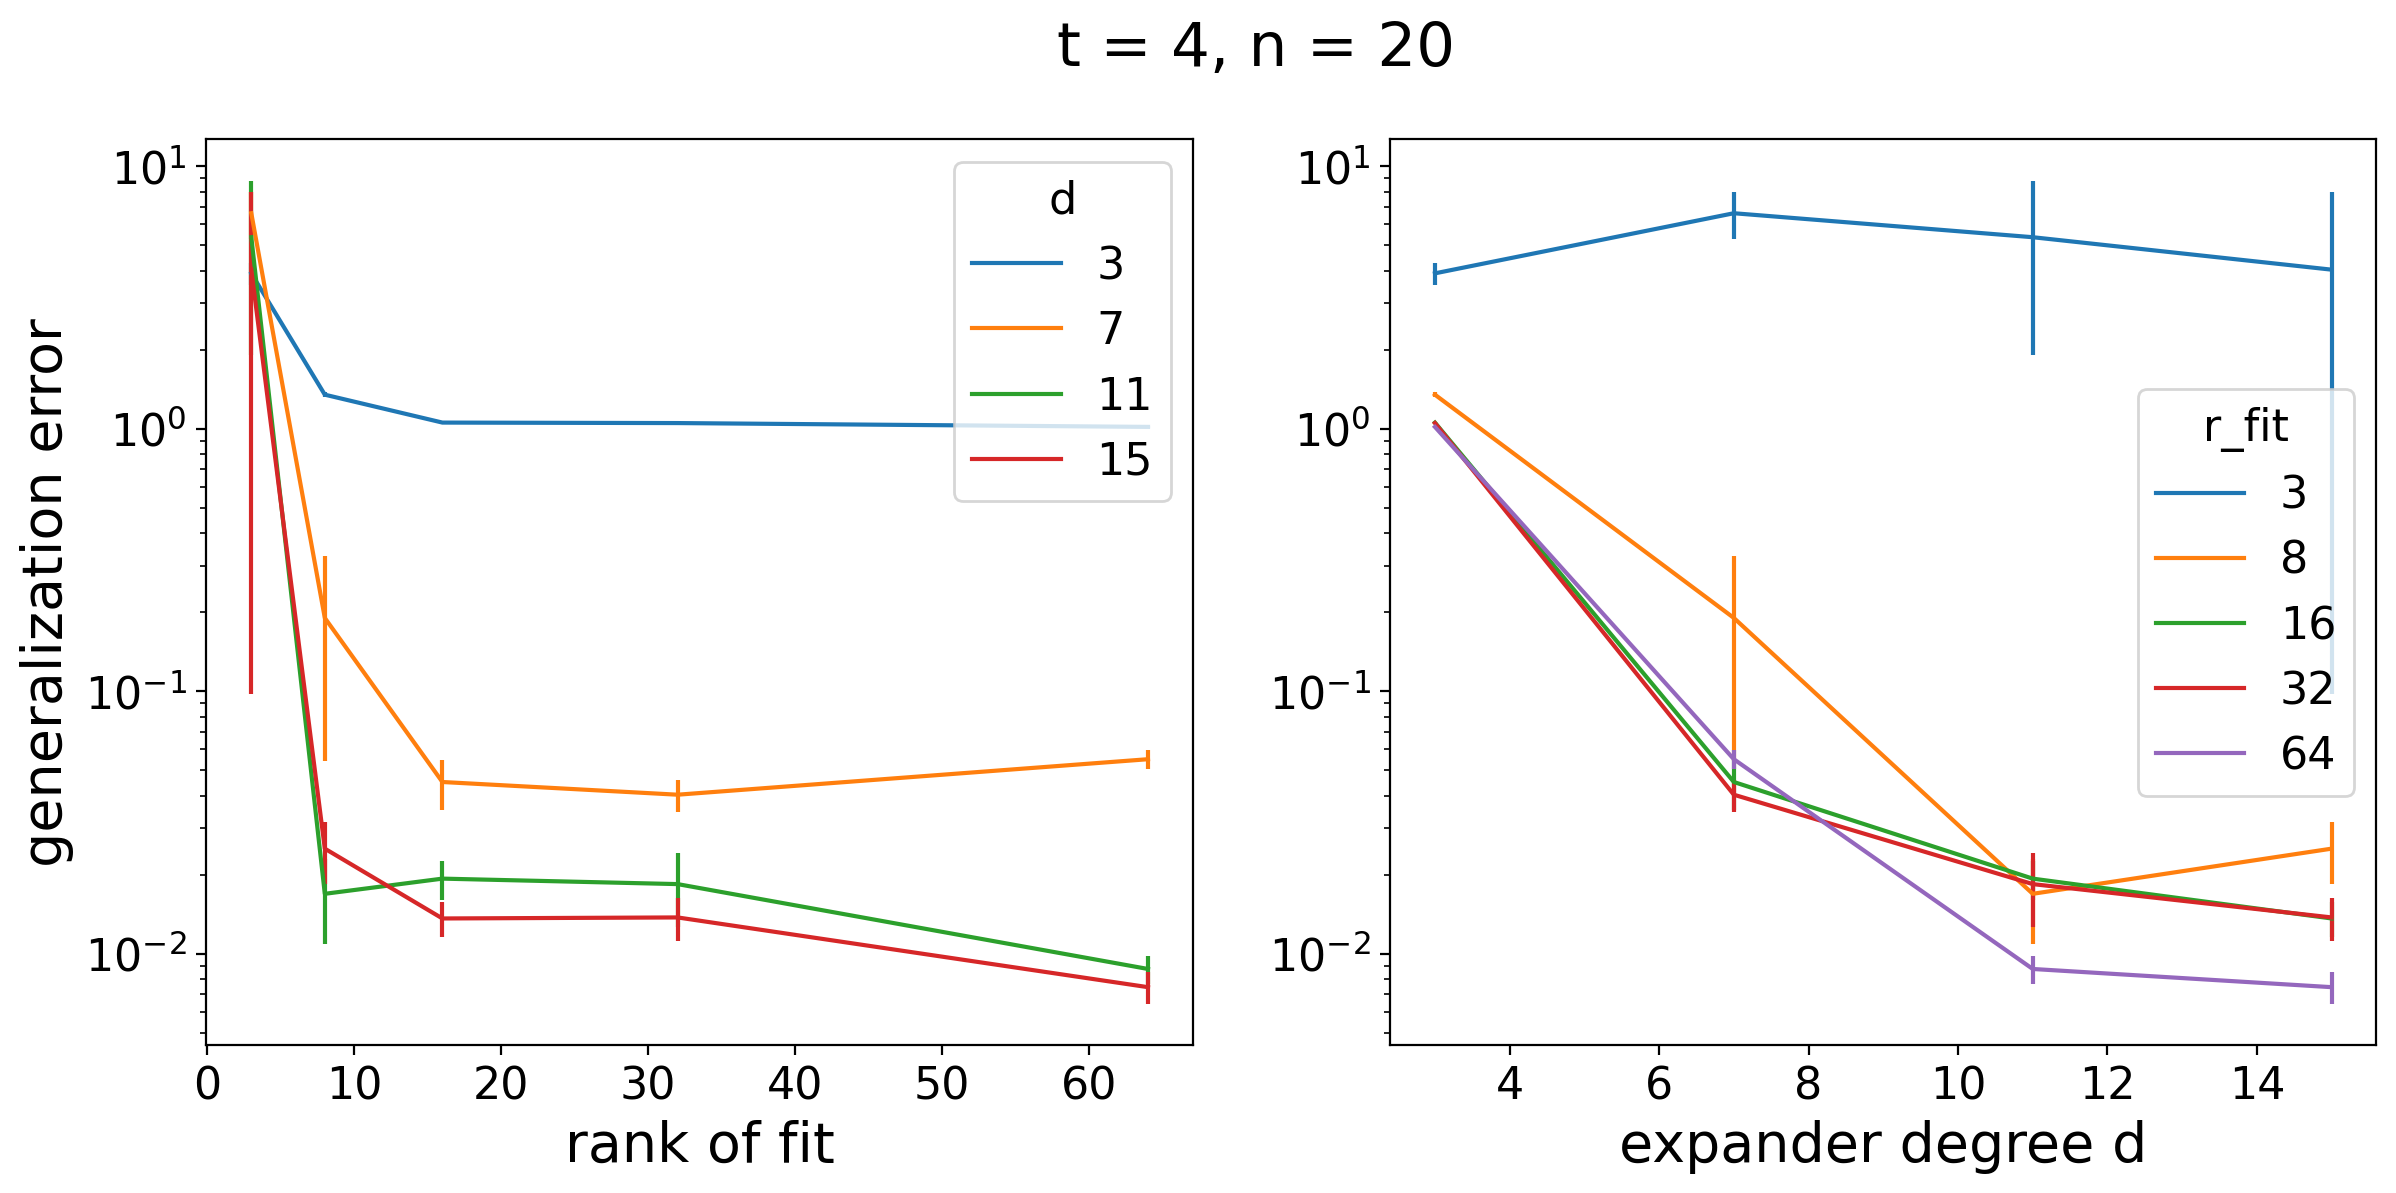

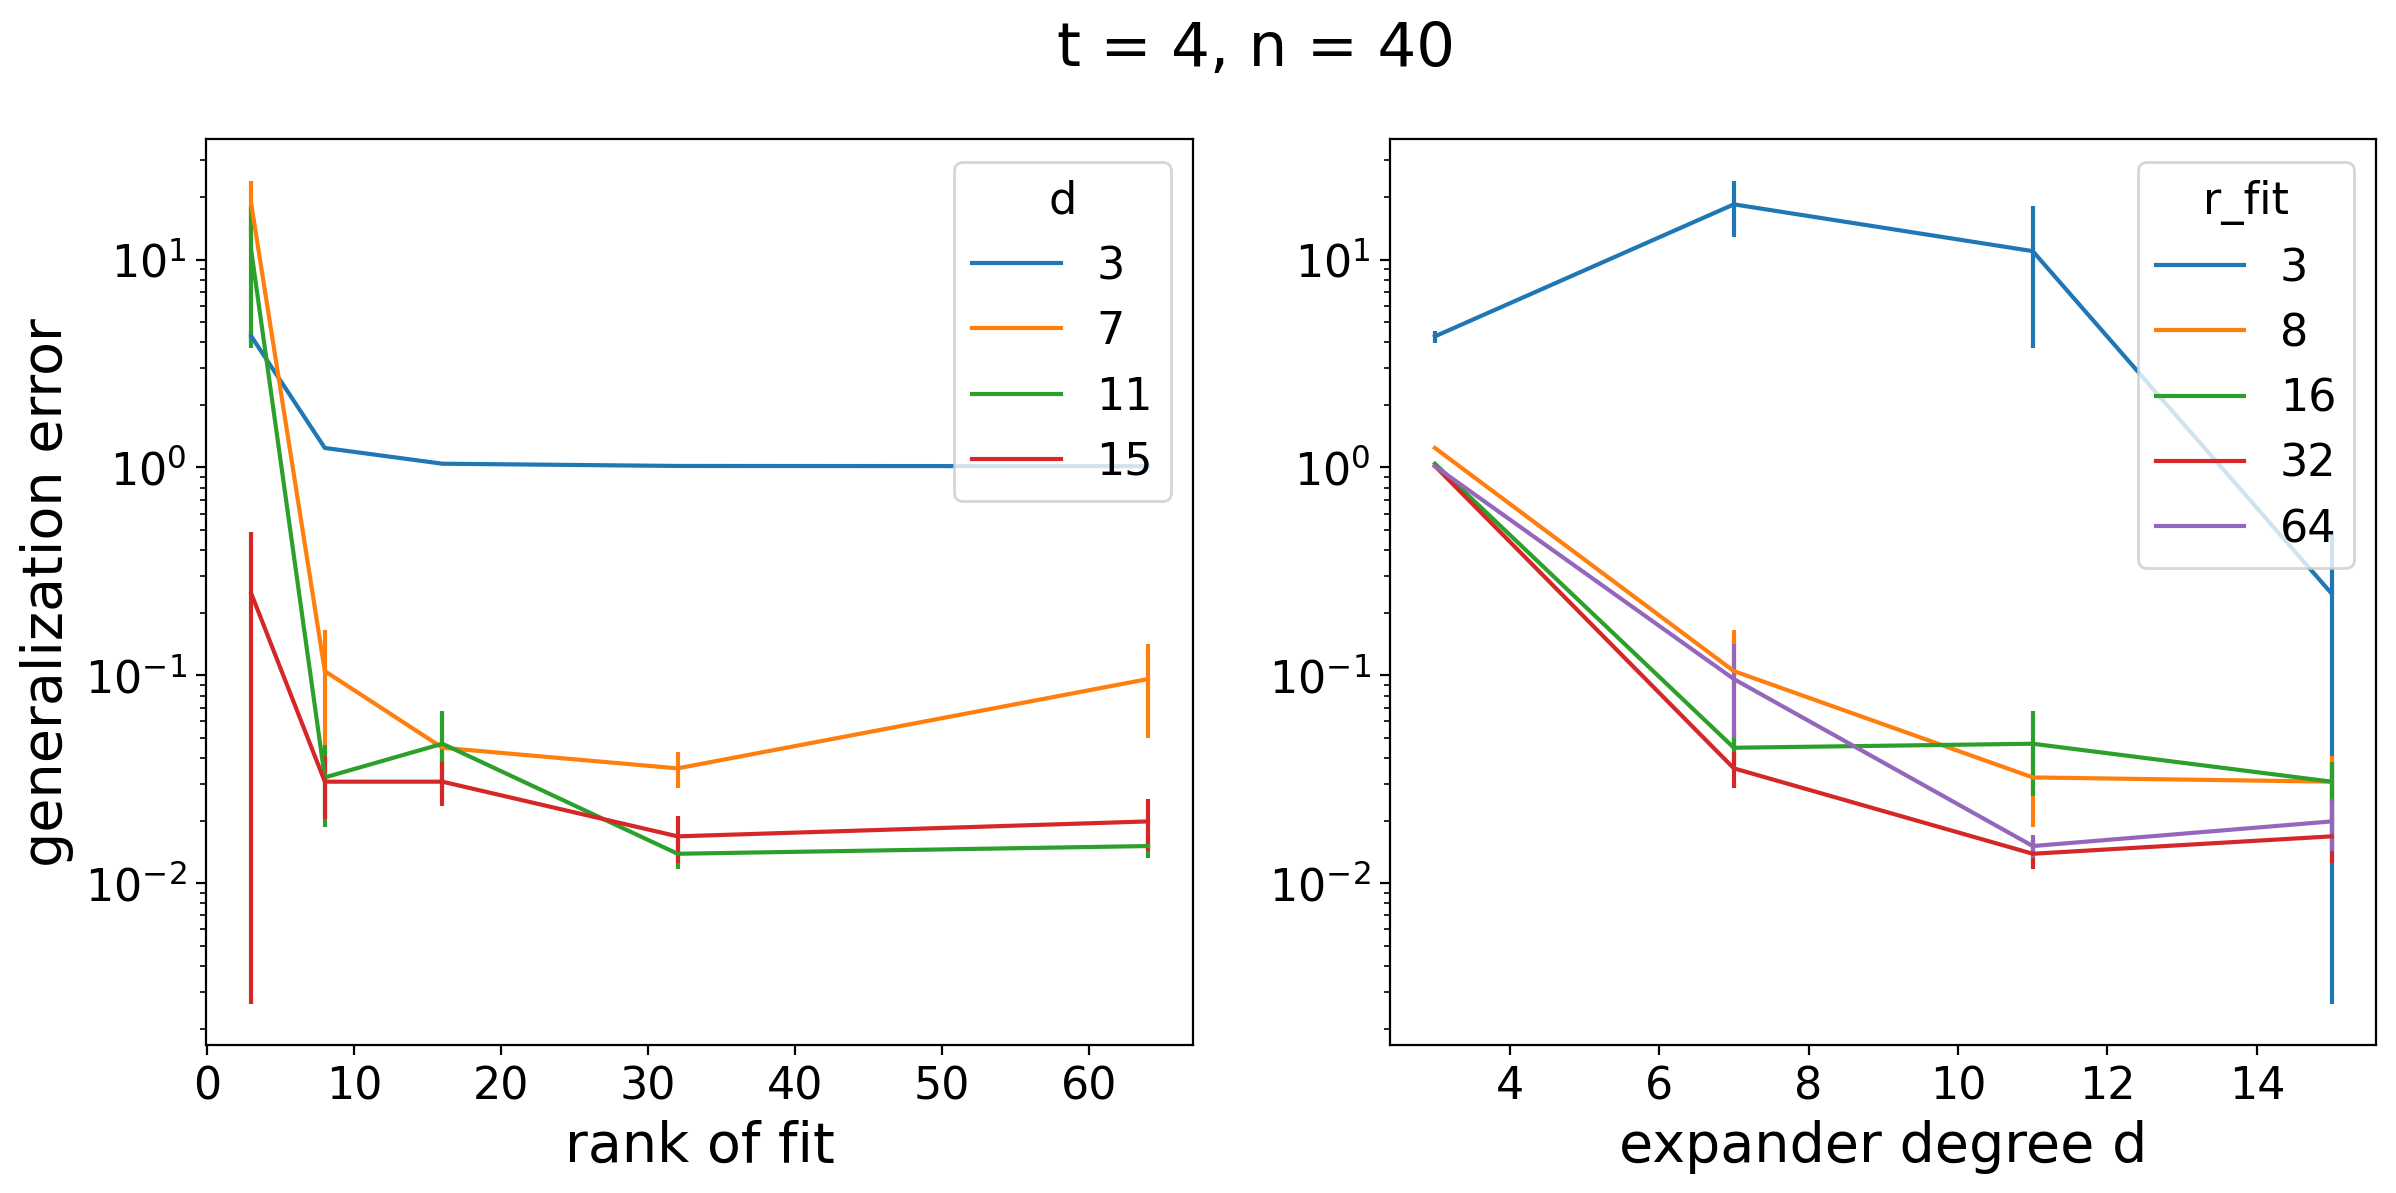

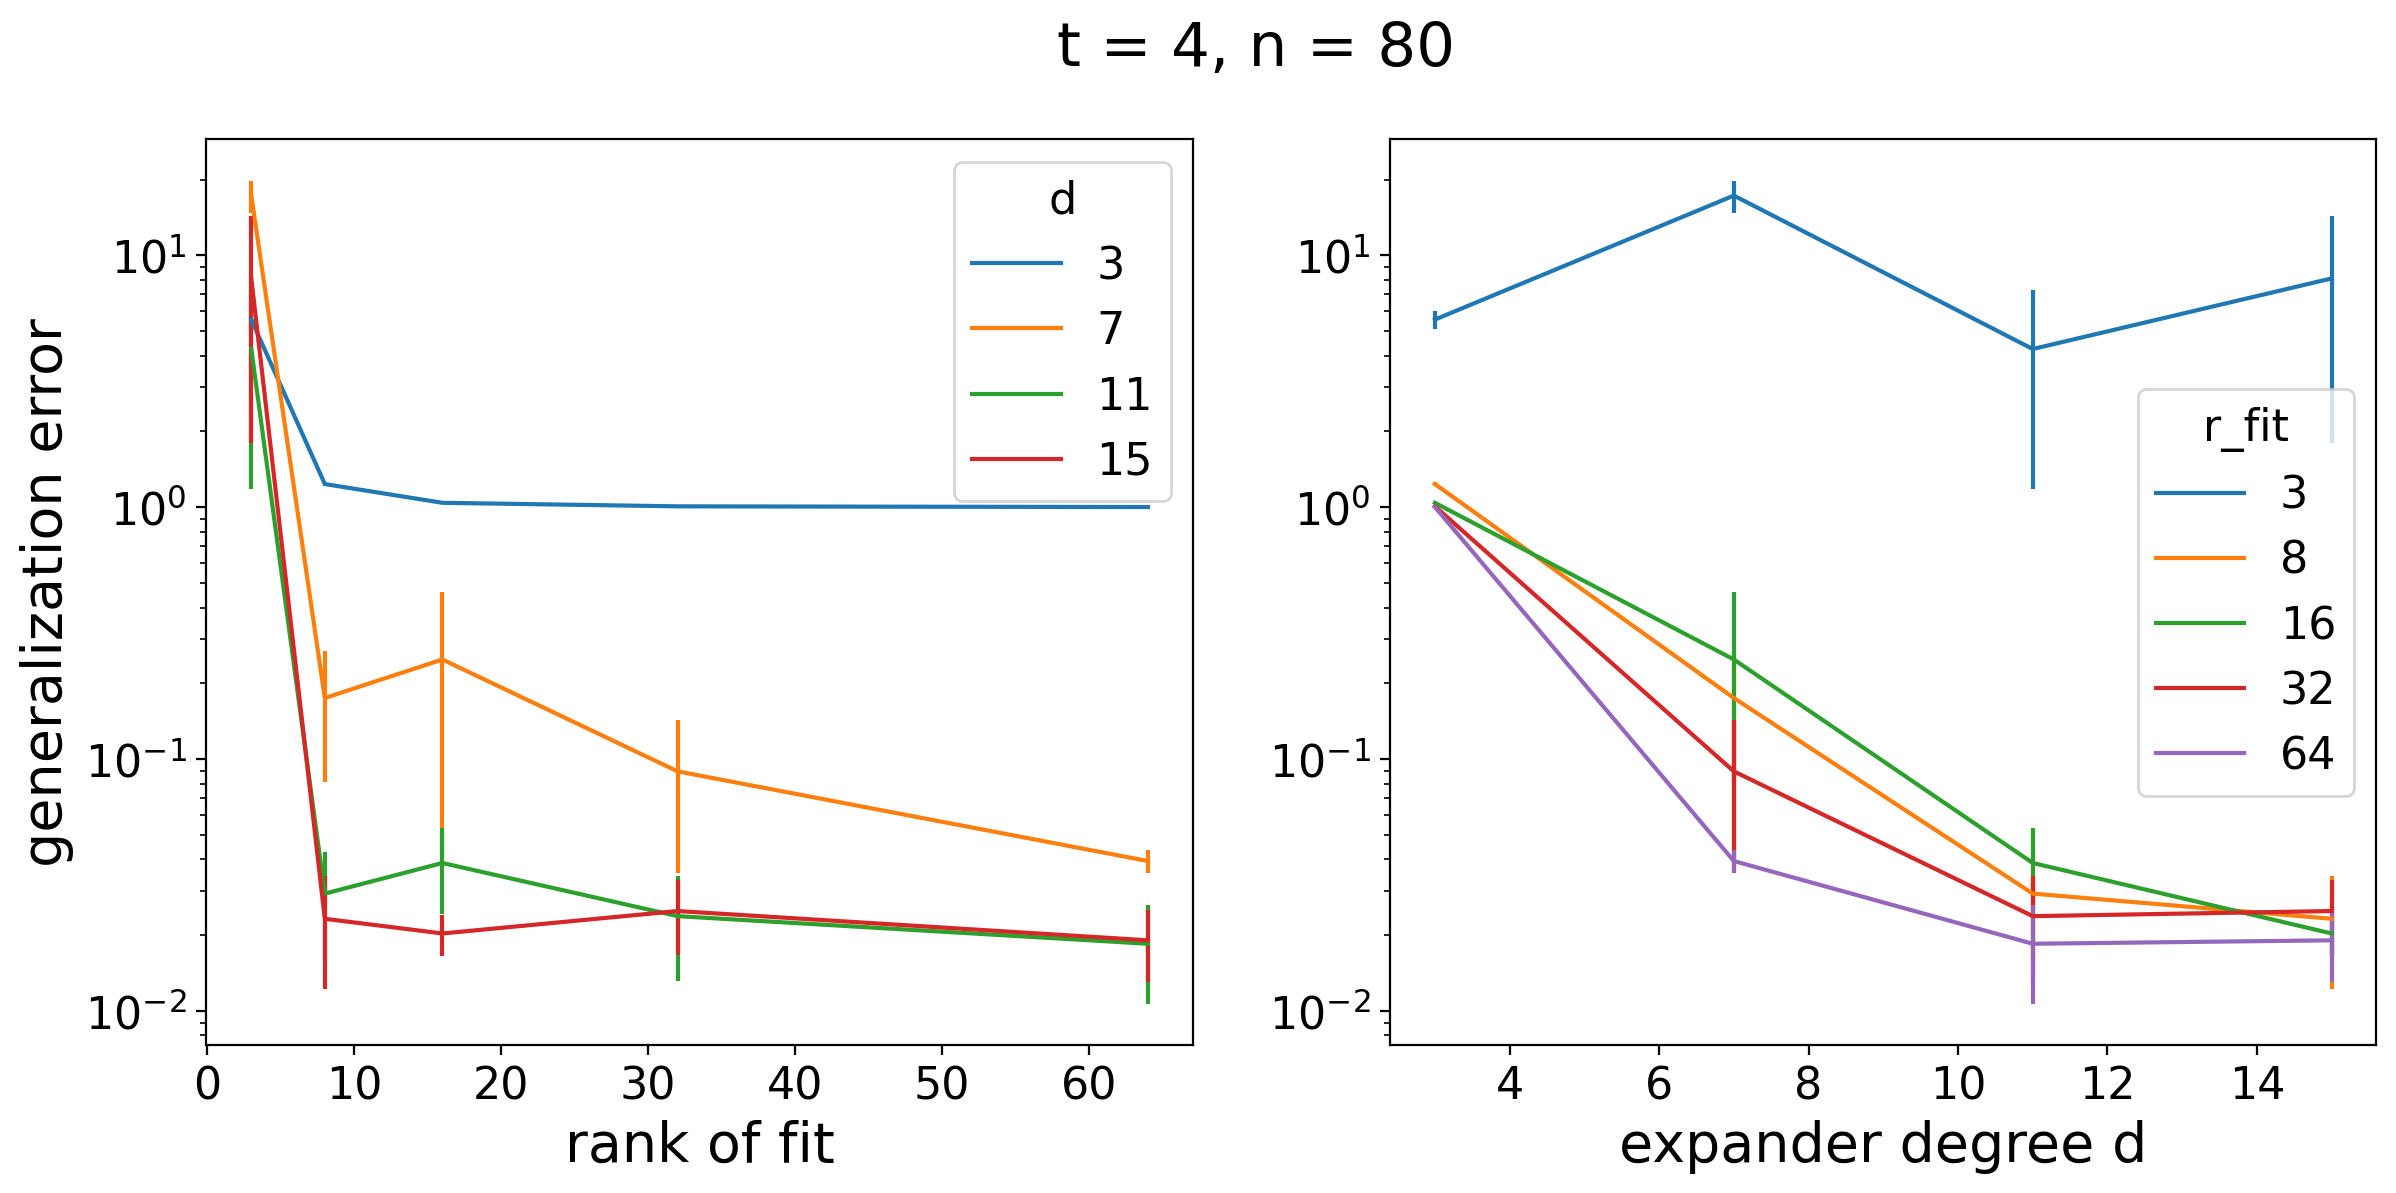

In [28]:
this_sigma = 0.0

for this_t in [3, 4]:
    for this_n in [20, 40, 80]:        
        grp = data[(data['t'] == this_t) & 
                   (data['sigma'] == this_sigma) & 
                   (data['n'] == this_n)].groupby(['r_fit','d'])

        #grp.mean().plot(y='gen_err_fit', yerr=grp.std()/np.sqrt(10))\
        fig, axs = plt.subplots(1, 2, figsize=(14,6), dpi=200)
        plt.suptitle("t = %d, n = %d" % (this_t, this_n))
        grp.mean()['gen_err_fit'].unstack().plot(ax=axs[0], 
                                                 yerr=grp.sem()['gen_err_fit'].unstack(), 
                                                 logy=True)
        axs[0].set_xlabel('rank of fit')
        axs[0].set_ylabel('generalization error')

        grp = data[(data['t'] == this_t) & 
                   (data['sigma'] == this_sigma) & 
                   (data['n'] == this_n)].groupby(['d','r_fit'])
        grp.mean()['gen_err_fit'].unstack().plot(ax=axs[1],
                                                 yerr=grp.sem()['gen_err_fit'].unstack(),
                                                 logy=True)
        axs[1].set_xlabel('expander degree d')
        plt.savefig("expander_result_t_%d_n_%d.png" % (this_t, this_n))
#axs[1].set_ylabel('generalization error')
#plt.ylabel('generalization error')
#plt.ylim([0,1.5])